# **Homework 1** | Data handling


In [189]:
# Load libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from google.colab import drive

#### Colab utils
If you want to use colab for homework 1, these commands are useful

In [190]:
# Mount drive to access and save files in your own drive.
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [191]:
# Create class folder and move to folder
os.chdir("/content/drive/MyDrive/")
#!mkdir ML4BD
os.chdir("/content/drive/MyDrive/ML4BD")

## **Question 1** | Data retrival

For this exercise, we will be using the [census income data set](https://archive.ics.uci.edu/ml/datasets/census+income). To retrieve information we will use Unix shell comm

Advantages of using the Unix shell:
1. **Updating data**: Most of the times, behavioral data is dynamic and it is likely to be updated. Creating a shell script as the first step of the pipeline, allows us to automatically load and process the updated versions of the data.
2. **Memory efficency**: Behavioral data can be very large and some libraries can run out memory. Through bash it is possible to process the data without reading the entire file into memory.

[Learn more about Shell](http://swcarpentry.github.io/shell-novice/)

To run shell commands, add an explamation mark before the instruction.

Anything appearing after ``!`` on a line will be executed not by the Python kernel, but by the system command-line.

```
! command
```



 

### **Question 1 | Part A: Extract data**
Download the data: adult.data and the column names: adult.names from https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/ using Unix commands only.

Create a folder called data and move the files to the folder data. 

In [192]:
# Download data adult.data
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Download column names adult.names
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names'

# Create data directory
#! mkdir data

# Move data file (census-income.data) and column names (census-income.names) to data directory
# Try using one command only (globbing)
! mv adult.* data

# Check that file is in folder 
!ls data

--2021-02-17 13:18:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  6.43MB/s    in 0.6s    

2021-02-17 13:18:33 (6.43 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2021-02-17 13:18:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names’

adult.names         100%[===================>]   5.11K  --.-KB/s    in 0s      

2021-

### **Question 1 | Part B**
Visualize the column names in data/adult.names. (from line 97 to line 111)

In [201]:
# show content of data/adult.names
! sed -n 97,111p  data/adult.names 

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Ri

## **Question 2** | Differences in samples


### **Question 2 | Part A**: Create sample

In this exercise we will examine the effects of using samples instead of the entire dataset. 

As seen above, the first variable of the census is age, extract only the first column (age) and create three samples:
1. All the observations (data_complete)
2. The first 100 age observations (data_first)
3. A random sample of 100 observations (data_random)


It is possible to store results from shell queries as variables. For example: 
```
variable = ! cat data/adult.data 
```

Tip: awk can be used to extract a specific column 


In [281]:
# All the observations for age 
data_complete =  !awk -F"," '{print $1}' data/adult.data  |\
                 head -n -1 

# First 100 observations for age 
data_first = !awk -F"," '{print $1}' data/adult.data |\
             head -n 100 

# Random sample of 100 observations for age excluding the first 100 observations
data_random  = !awk -F"," '{ print $1 }' data/adult.data |\
                 tail -n +10  | \
                 shuf -n 100 

### **Question 2 | Part B**: Explore samples

**2.B.1** Calculate the mean, median, number of observations and standard deviation fall for each sample.

In [282]:
data_complete  = np.array(data_complete, dtype = np.float)
data_first  = np.array(data_first, dtype = np.float)
data_random = np.array(data_random, dtype = np.float)

df = pd.DataFrame({'value': np.concatenate([data_complete, data_first, data_random]),
                   'sample': ['complete']*len(data_complete) +
                              ['first']*len(data_first) + 
                              ['random']*len(data_random) 
})

In [283]:
# Calcluate stats per group 
df.groupby(['sample']).agg(['mean', 'median', 'count', 'std'])

value                         
               mean median  count        std
sample                                      
complete  38.581647   37.0  32561  13.640433
first     38.390000   37.5    100  12.198605
random    39.210000   38.5    100  13.910460

**2.B.2** Create a boxplot comparing the three samples

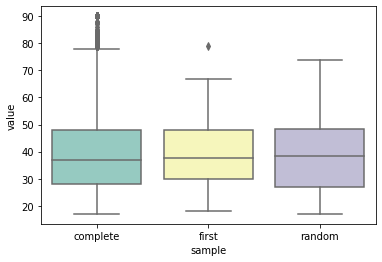

In [284]:
# Boxplot per group 
ax = sns.boxplot(x="sample", y="value", data=df, palette="Set3")

**2.B.3** Interpret your results

### **Question 2 | Part C**: Statistical significance

**Are the ages from the random and the first sample significantly different?** 

If we want to use t-test we must first check the assumptions:
1. Samples are independent: No individual is in group A and B. This holds true given that the random sample was built excluding the first 100 rows.
2. Population distributions are normal (Shapiro-Wilk test)
3. Homegeneity of variance (Levene's test)

Learn more about statistical test [here](https://www.graphpad.com/support/faqid/1790/)


**2.C.1** Run the Shapiro-Wilk test on the sampling differences (sample1 - sample2) to test if the population distributions are normal.



In [285]:
# Population distributions are normal (Shapiro-Wilk test)
sampling_difference = data_random - data_first
w_statistic, p_value = stats.shapiro(sampling_difference)
print(p_value)

0.4657280147075653


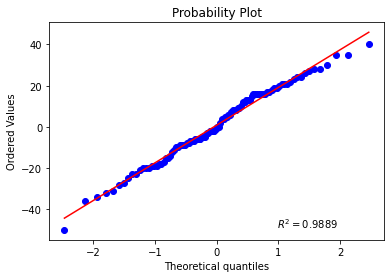

In [286]:
normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference", fontsize= 20)
plt.show()

**2.C.2** Use Levene's test to check the homegeneity of variance

In [287]:
# Homegeneity of variance (Levene's test)
stats.levene(data_random,data_first,center= 'mean')

LeveneResult(statistic=1.5317159208265065, pvalue=0.21732071998377078)

**2.C.3** Test the statistical significance of both samples. Depending on the previous results, you might be able to use the T-test

In [288]:
stats.ttest_ind(data_complete, data_first)

Ttest_indResult(statistic=0.14032637231113737, pvalue=0.8884029937661627)

**2.C.4** Interpret your results

**2.C.5** Repeat question 2 using samples of size 10 instead of 100. How do the results change? 

## **Question 3 | Data Visualization**

For this question, you can use the entire dataset or just a sample. 

### **Question 3 | Part A**: Data loading

**3.A.1** Retrieve the column names from data/adult.names

In [244]:
colnames = ! sed -n 97,112p  data/adult.names | \
awk -F":" '{ print $1 }' 
colnames

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

**3.A.2** Load the dataset with the appropiate column names

In [295]:
df = pd.read_csv("data/adult.data",  names = colnames, index_col = False)

In [296]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


**3.A.3** Create a sub dataframe (df_numerical) with all the numerical features. 

In [298]:
df_numerical = df.select_dtypes([np.int64])

### **Question 3 | Part B**: Numerical features

KeyError: ignored

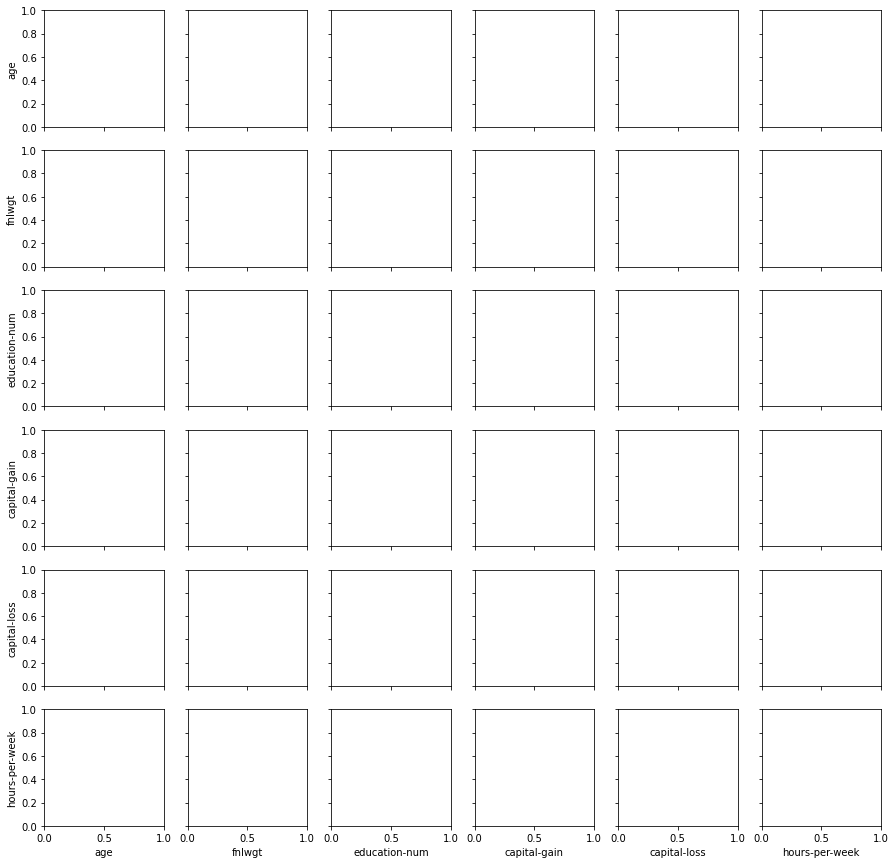

In [302]:
sns.pairplot(df_numerical,  hue="education")

In [ ]:
df = pd.read_csv('data/e-shop clothing 2008.csv', delimiter=';')

In [ ]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
